In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# Mobile Price Estimator

# <h1 style='background-color:orange; border-radius: 50px 50px; text-align:center'>Table of Contents</h1>
<a class='anchor' id='backtotop'></a>
1. [Problem Statement](#probstatement)
2. [Data Processing](#dataprocessing)
3. [Exploratory Data Analysis](#eda)
    1. [Column Definitions](#eda_coldef)
    2. [Data Visualization](#eda_datavis)
4. [Model Training](#model)
    1. [Logistic Regression](#model_lr)
    2. [KNN](#model_knn)
    3. [SVC](#model_svc)
    4. [Decision Tree](#model_dt)
    5. [Random Forest](#model_rf)
5. [Conclusion](#conclusion)

<h1 style="background-color:orange;text-align:center;border-radius: 50px 50px;">Problem Statement</h1>
<a class='anchor' id='probstatement'></a>

[back to top](#backtotop)

A new company in the market wants to estimate cost of a mobile based on its features like RAM, internal memory etc.

<h1 style="background-color:orange;text-align:center;border-radius: 50px 50px;">Data Processing</h1>
<a class='anchor' id='dataprocessing'></a>

[back to top](#backtotop)

In [2]:
# Importing training set
df_train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
display(df_train.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<h1 style="background-color:orange;text-align:center;border-radius: 50px 50px;">Exploratory Data Analysis</h1>
<a class='anchor' id='eda'></a>

[back to top](#backtotop)

In [3]:
# Looking at columns in dataframe and number of non-null values in each of the column, also noting data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Total 19 independent variables and 1 Dependent variable of "price_range". All columns  have numeric values with none having null values.

In [4]:
# Printing names of columns in training set
print(df_train.columns)
print("\n")
print("There are total {} columns in the training set.".format(len(df_train.columns)))

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


There are total 21 columns in the training set.


## <span style="background-color:orange;text-align:center;border-radius: 50px 50px;">Column Definitions</span>
<a class='anchor' id='eda_coldef'></a>

1. battery_power: Total energy battery can store in mAh.
2. blue: Has bluetooth or not
3. clock_speed: Microprocessor speed
4. dual_sim: Has dual sim support or not
5. fc: Front camera in mega pixels.
6. four_g: Has 4G or not
7. int_memory: Internal memory in gigabytes
8. m_dep: Mobile depth in cm.
9. mobile_wt: weight of mobile phone
10. n_cores: number of cores of processor
11. pc: Primary camera megapixels
12. px_height: Pixel resolution height
13. px_width: Pixel resolution width
14. ram: RAM in MB
15. sc_h: screen heigh in cm
16. sc_w: screen width in cm
17. talk_time: longest time a battery can last
18. three_g: has 3g or not
19. touch_screen: has touch screen or not
20. wifi: Has wifi or not

In [5]:
# Let's count number of unique values in "price_range column"
df_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Each price range has equal number of occurence in the dataset.

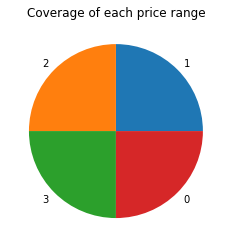

In [6]:
import matplotlib.pyplot as plt
plt.pie(df_train['price_range'].value_counts(),
       labels = df_train['price_range'].value_counts().index)
plt.title("Coverage of each price range")
plt.show()

In [7]:
# Let's read the test data also
df_test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')
display(df_test.head())

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## <span style="background-color:orange;text-align:center;border-radius: 50px 50px;">Data Visualization</span>
<a class='anchor' id='eda_datavis'></a>

[back to top](#backtotop)

In [8]:
import matplotlib.pyplot as plt

def plot_cols(dframe, col_to_plot: str):
    '''
    Input:
    dframe --> dataframe
    col_to_plot --> column in dframe dataframe in string format
    -----------------------
    The function plots unique values bar distribution corresponding to the
    specified column in input dataframe.
    '''
    
    fig, ax = plt.subplots(1,1, figsize=(16,8))
    ax.bar(dframe[col_to_plot].value_counts().reset_index()['index'],
           dframe[col_to_plot].value_counts().reset_index()[col_to_plot])
    ax.set_xlabel(col_to_plot)

In [9]:
print(plot_cols.__doc__)


    Input:
    dframe --> dataframe
    col_to_plot --> column in dframe dataframe in string format
    -----------------------
    The function plots unique values bar distribution corresponding to the
    specified column in input dataframe.
    


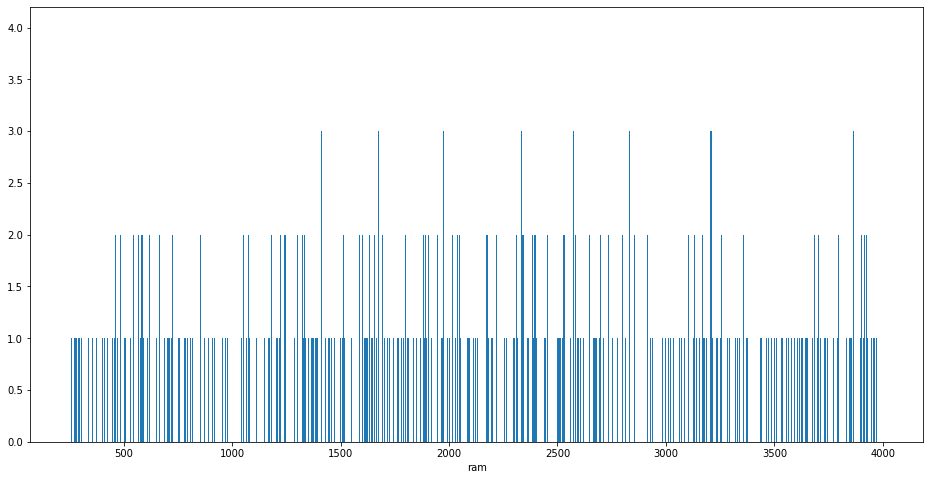

In [10]:
plot_cols(df_train, 'ram')

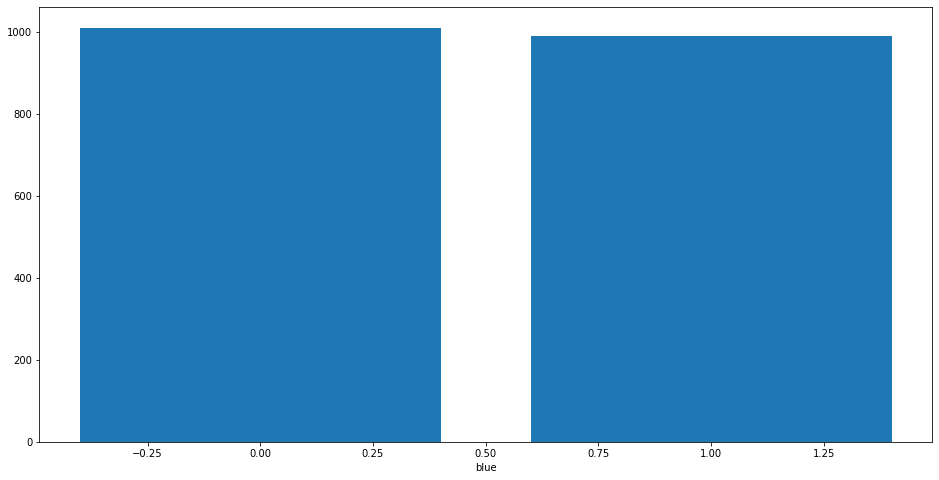

In [11]:
plot_cols(df_train, 'blue')

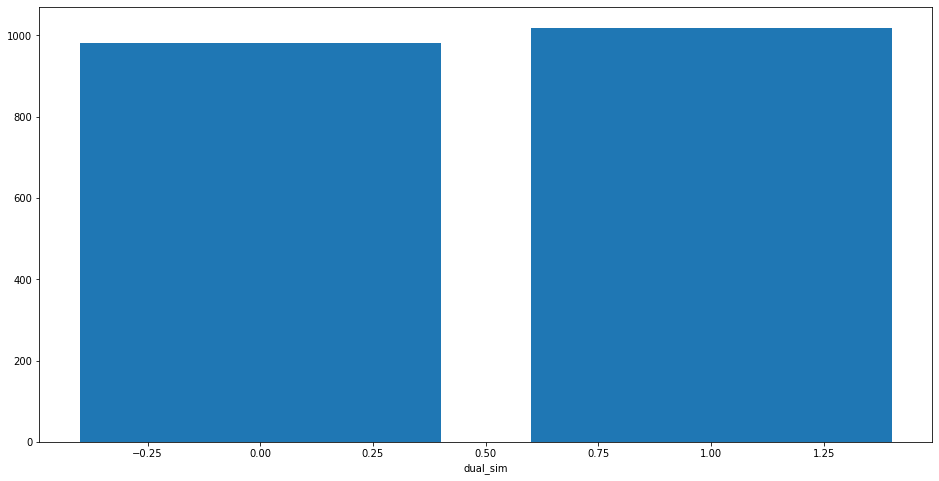

In [12]:
plot_cols(df_train, 'dual_sim')

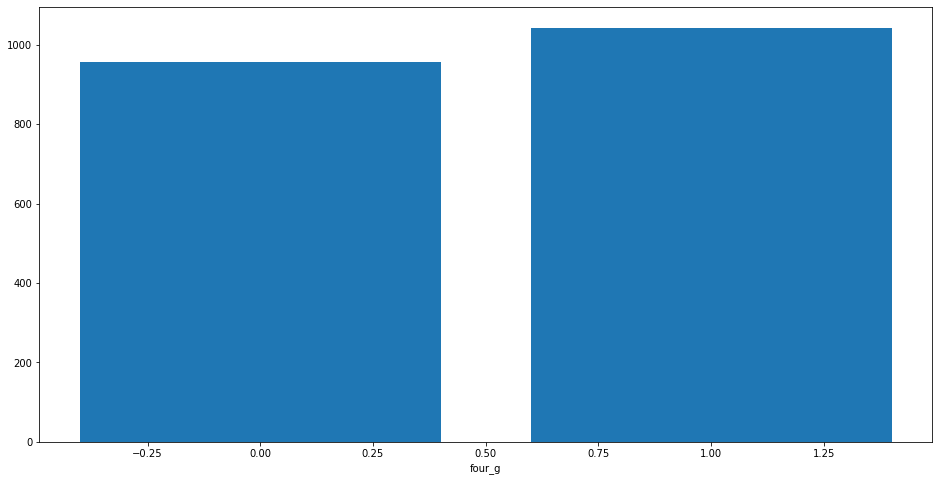

In [13]:
plot_cols(df_train, 'four_g')

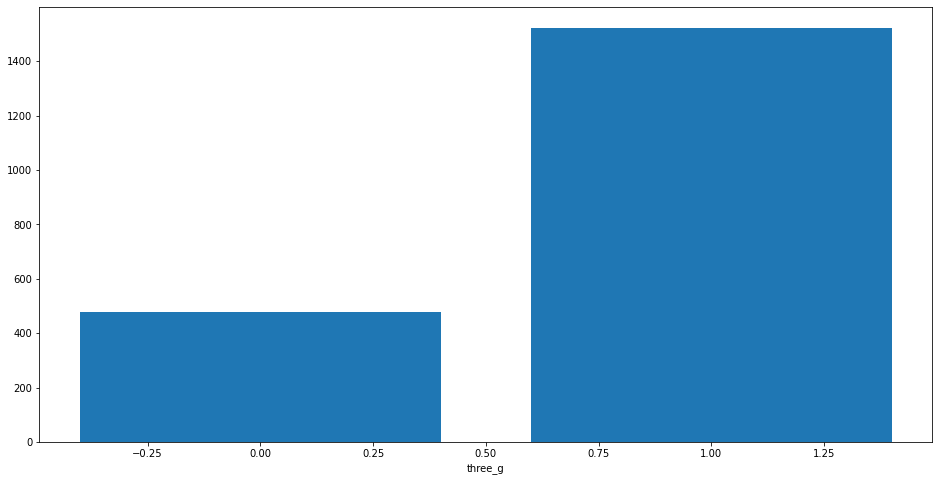

In [14]:
plot_cols(df_train, 'three_g')

<AxesSubplot:xlabel='three_g', ylabel='count'>

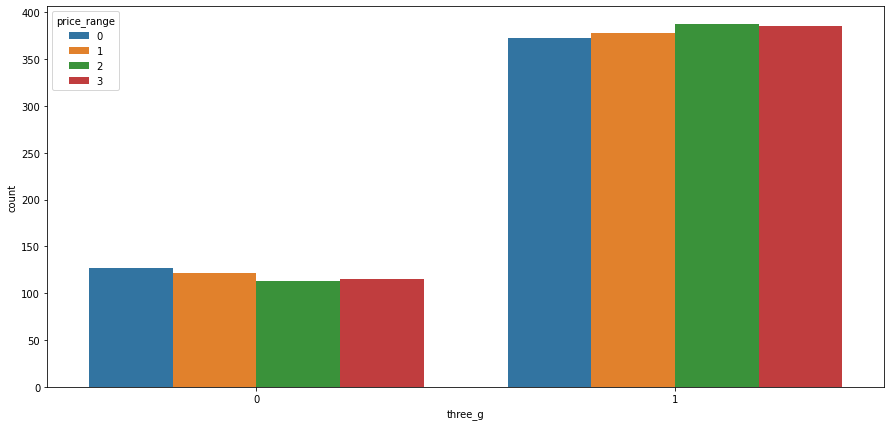

In [15]:
import seaborn as sns

fig = plt.figure(figsize=(15,7))
sns.countplot(x='three_g',
             data=df_train,
             hue='price_range')

In [16]:
cols_list = ['wifi', 'blue', 'dual_sim', 'three_g', 'four_g', 'touch_screen']

df_col_list =[]

for j in cols_list:
    df_col_list.append(df_train.groupby('price_range')[j].value_counts())

In [17]:
df_groupby_price = pd.DataFrame(df_col_list, index=cols_list).T
df_groupby_price

wifi  blue  dual_sim  three_g  four_g  touch_screen
price_range                                                       
0           0   252   257       250      127     241           238
            1   248   243       250      373     259           262
1           0   248   255       245      122     238           239
            1   252   245       255      378     262           261
2           0   248   257       251      113     253           265
            1   252   243       249      387     247           235
3           0   238   241       235      115     225           252
            1   262   259       265      385     275           248

In [18]:
import plotly.express as px
px.box(df_train, x='price_range', y='ram', labels={'price_range': 'Price Range'},
      title="<b>Effect of ram on price")

In [19]:
px.box(df_train, x='price_range', y='battery_power',title="<b>Effect of battery power on price")

**We can say as the battery power and ram increases, price range increases for the mobile.**

<h1 style="background-color:orange;text-align:center;border-radius: 50px 50px;">Model Training</h1>
<a class='anchor' id='model'></a>

[back to top](#backtotop)

In [20]:
# Importing libraries
# Preparing dataset of independent variables and dependent variable

from sklearn.model_selection import train_test_split

x_data = df_train.drop('price_range', axis=1)
y_data = df_train['price_range'].values

In [21]:
# Normalization
x_norm = ((x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))).values
print(x_norm.shape)


(2000, 20)


In [22]:
# Splitting into training and test dataset
x_train,x_test,y_train,y_test=train_test_split(x_norm,y_data,test_size=0.10)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1800, 20) (200, 20) (1800,) (200,)


## <span style="background-color:orange;text-align:center;border-radius: 50px 50px;">Logistic Regression</h2>
<a class='anchor' id='model_lr'></a>

[back to top](#backtotop)

In [23]:
# Importing library
from sklearn.linear_model import LogisticRegression

In [24]:
# Fitting data to classifier
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [25]:
score_dict={}
score_dict['Test Set LR'] = round(lr.score(x_test, y_test)*100,2)

print(score_dict)

{'Test Set LR': 92.0}


## <span style="background-color:orange;text-align:center;border-radius: 50px 50px;">KNN</span>
<a class='anchor' id='model_knn'></a>

[back to top](#backtotop)

In [26]:
# Importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Fitting the classifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [28]:
score_dict['Test Set KNN'] = round(knn.score(x_test, y_test),2)*100
print(score_dict)

{'Test Set LR': 92.0, 'Test Set KNN': 52.0}


## <span style="background-color:orange;text-align:center;border-radius: 50px 50px;">SVC</span>
<a class='anchor' id='model_svc'></a>

[back to top](#backtotop)

In [29]:
# Importing libraries
from sklearn.svm import SVC

In [30]:
# Fitting the data
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [31]:
score_dict['Test Set SVM'] = round(svm.score(x_test, y_test),2)*100
print(score_dict)

{'Test Set LR': 92.0, 'Test Set KNN': 52.0, 'Test Set SVM': 86.0}


## <span style="background-color:orange;text-align:center;border-radius: 50px 50px;">Decision Tree</span>
<a class='anchor' id='model_dt'></a>

[back to top](#backtotop)

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
score_dict['Test Set DT'] = round(dt.score(x_test, y_test),2)*100
print(score_dict)

{'Test Set LR': 92.0, 'Test Set KNN': 52.0, 'Test Set SVM': 86.0, 'Test Set DT': 82.0}


## <span style="background-color:orange;text-align:center;border-radius: 50px 50px;">Random Forest</span>
<a class='anchor' id='model_rf'></a>

[back to top](#backtotop)

In [34]:
# Importing libraries
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=1)

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [36]:
score_dict['Test Set RF'] = round(rf.score(x_test, y_test),2)*100
print(score_dict)

{'Test Set LR': 92.0, 'Test Set KNN': 52.0, 'Test Set SVM': 86.0, 'Test Set DT': 82.0, 'Test Set RF': 89.0}


<h1 style="background-color:orange;text-align:center;border-radius: 50px 50px;">Conclusions</h1>
<a class='anchor' id='conclusion'></a>

[back to top](#backtotop)

In [37]:
print(score_dict)

{'Test Set LR': 92.0, 'Test Set KNN': 52.0, 'Test Set SVM': 86.0, 'Test Set DT': 82.0, 'Test Set RF': 89.0}


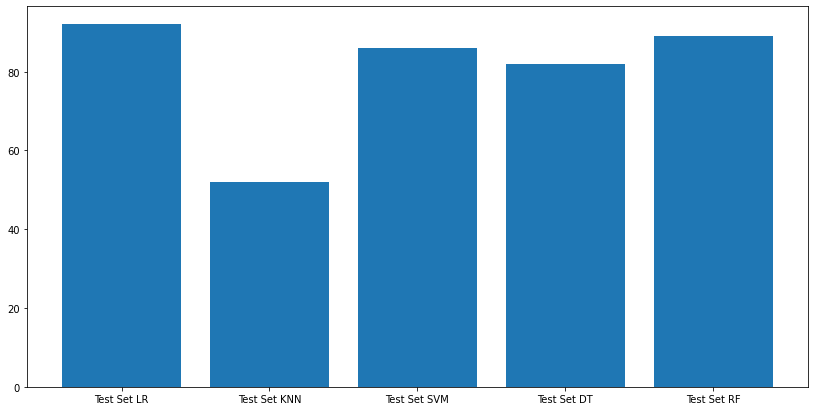

In [38]:
plt.figure(figsize=(14, 7))
plt.bar(list(score_dict.keys()), list(score_dict.values()), tick_label=list(score_dict.keys()))
plt.show()